In [1]:
# import libraries
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import Layout, Box, Label, RadioButtons, Tab, HBox, VBox, Accordion, Select, interactive, Dropdown, interact
import subprocess

In [2]:
#### Simulation Files #####

# PFLOTRAN INPUT DECK FILE NAME
PF_input_filename = "OM_oxidation_size_fractionv2"

# EXPERIMENTAL DATA FILE
df = pd.read_csv("OWC_WTC_OXINC_data.csv")

# PFLOTRAN OUTPUT FILENAME FOR PLOTTING
filename = './OM_oxidation_size_fractionv2-obs-0.pft'

In [3]:
########################################## RUN PFLOTRAN ####################################
import subprocess
#import shutil
#shutil.copy("/software/pflotran/regression_tests/default/batch/cybernetic.py",".")
#shutil.copy("/software/pflotran/database/cybernetic.dat",".")

In [4]:
fout = open("OM_oxidationsize_fractionv2.stdout","w")
subprocess.run(["pflotran","-input_prefix",PF_input_filename],stdout=fout, stderr=fout)
fout.close()

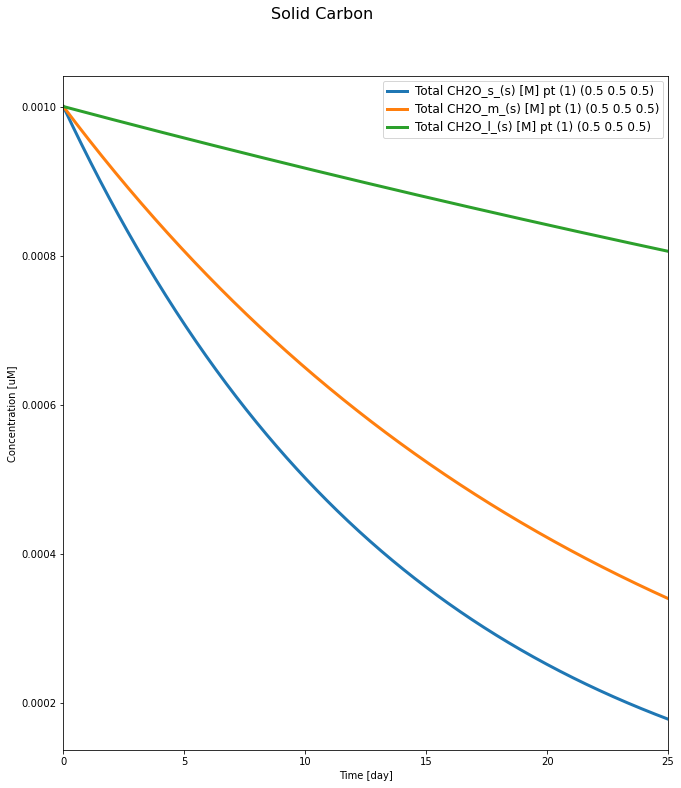

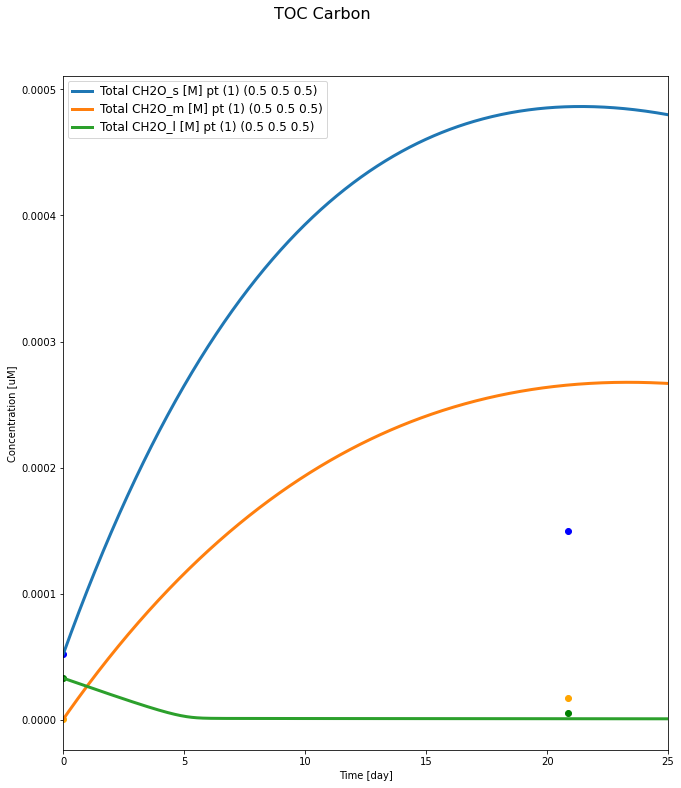

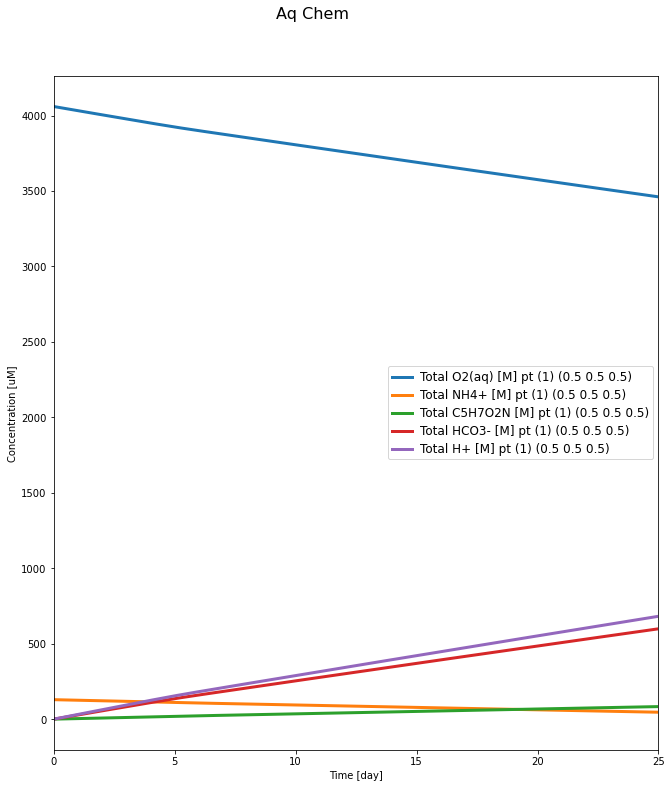

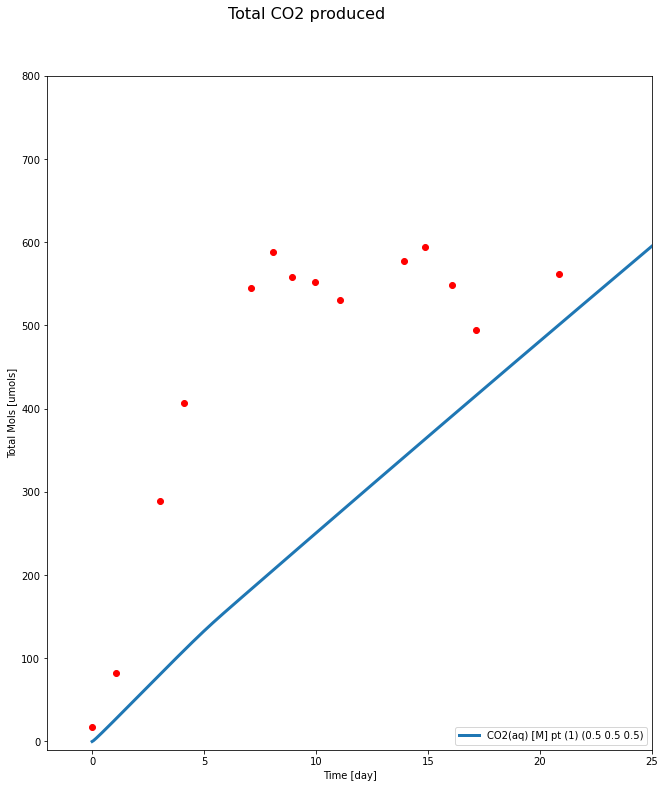

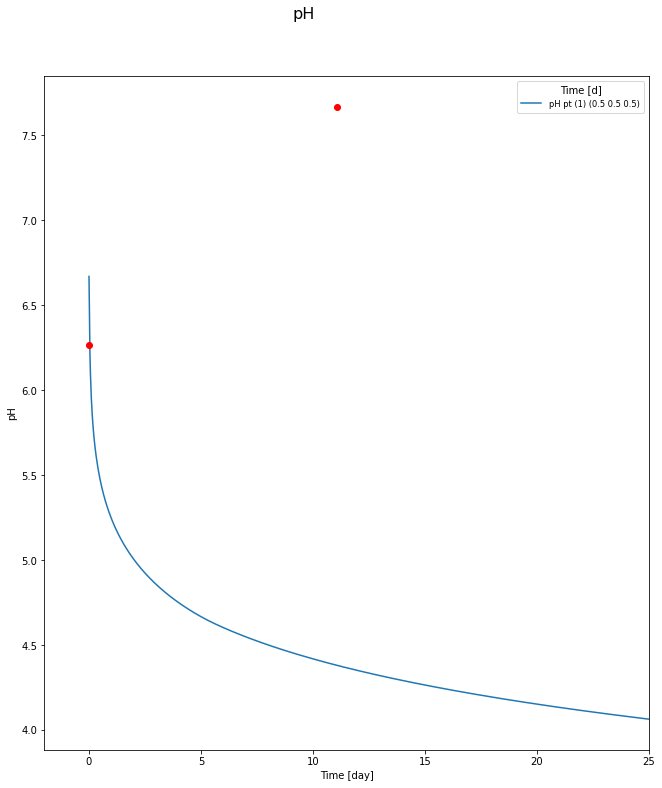

In [5]:
########################################### PLOT RESULTS ###################################
import sys
import os
try:
  pflotran_dir = os.environ['PFLOTRAN_DIR']
except KeyError:
  print('PFLOTRAN_DIR must point to PFLOTRAN installation directory and be defined in system environment variables.')
  sys.exit(1)
sys.path.append(pflotran_dir + '/src/python')
#import numpy as np
#%matplotlib notebook
#%matplotlib inline
#%matplotlib widget

import matplotlib
import matplotlib.pyplot as plt
import math
import pflotran as pft

import sys
import os
try:
  pflotran_dir = os.environ['PFLOTRAN_DIR']
except KeyError:
  print('PFLOTRAN_DIR must point to PFLOTRAN installation directory and be defined in system environment variables.')
  sys.exit(1)
sys.path.append(pflotran_dir + '/src/python')

#import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import pflotran as pft

path = []
path.append('.')

############### SOLID Carbon Plots ###############
f = plt.figure(figsize=(12,12))
plt.subplot(1,1,1)
f.suptitle("Solid Carbon",fontsize=16)
plt.xlabel('Time [day]')
plt.ylabel('Concentration [uM]')

plt.xlim(0.,25)

icol = []
icol.append(3)
icol.append(4)
icol.append(5)

for i in range(len(icol)):
  data = pft.Dataset(filename,1,icol[i])
  plt.plot(data.get_array('x'),data.get_array('y'),label=data.get_name('yname'), linewidth=3)
#  plt.plot(data.get_array('x'),data.get_array('y')*1000000,label=label[i], linewidth=3)

plt.legend(loc=0)
plt.setp(plt.gca().get_legend().get_texts(),fontsize='large')
f.subplots_adjust(hspace=0.2,wspace=0.2,
                  bottom=.12,top=.9,
                  left=.2,right=.9)
plt.show()

############### AQUEOUS Carbon Plots ###############
f = plt.figure(figsize=(12,12))
plt.subplot(1,1,1)
f.suptitle("TOC Carbon",fontsize=16)
plt.xlabel('Time [day]')
plt.ylabel('Concentration [uM]')

plt.xlim(0.,25)

icol = []
icol.append(6)
icol.append(7)
icol.append(8)

for i in range(len(icol)):
  data = pft.Dataset(filename,1,icol[i])
  plt.plot(data.get_array('x'),data.get_array('y'),label=data.get_name('yname'), linewidth=3)
#  plt.plot(data.get_array('x'),data.get_array('y')*1000000,label=label[i], linewidth=3)

plt.legend(loc=0)
plt.setp(plt.gca().get_legend().get_texts(),fontsize='large')
f.subplots_adjust(hspace=0.2,wspace=0.2,
                  bottom=.12,top=.9,
                  left=.2,right=.9)
plt.scatter(df[df.columns[4]], df[df.columns[5]], color = 'blue', marker = 'o', label = "TOC-small")
plt.scatter(df[df.columns[4]], df[df.columns[6]], color = 'orange', marker = 'o', label = "TOC-medium")
plt.scatter(df[df.columns[4]], df[df.columns[7]], color = 'green', marker = 'o', label = "TOC-large")
plt.show()

################## AQ CHEM Plot ####################
f = plt.figure(figsize=(12,12))
plt.subplot(1,1,1)
f.suptitle("Aq Chem",fontsize=16)
plt.xlabel('Time [day]')
plt.ylabel('Concentration [uM]')

plt.xlim(0.,25)

icol = []
icol.append(9)
icol.append(10)
icol.append(11)
icol.append(12)
icol.append(13)

for i in range(len(icol)):
  data = pft.Dataset(filename,1,icol[i])
  plt.plot(data.get_array('x'),data.get_array('y')*1000000,label=data.get_name('yname'), linewidth=3)
#  plt.plot(data.get_array('x'),data.get_array('y')*1000000,label=label[i], linewidth=3)

plt.legend(loc=0)
plt.setp(plt.gca().get_legend().get_texts(),fontsize='large')
f.subplots_adjust(hspace=0.2,wspace=0.2,
                  bottom=.12,top=.9,
                  left=.2,right=.9)
plt.show()

################## Total CO2 produced Plot ####################
f = plt.figure(figsize=(12,12))
plt.subplot(1,1,1)
f.suptitle("Total CO2 produced",fontsize=16)
plt.xlabel('Time [day]')
plt.ylabel('Total Mols [umols]')

plt.xlim(-2.,25)
plt.ylim(-10.,800)

icol = []
icol.append(14)

for i in range(len(icol)):
  data = pft.Dataset(filename,1,icol[i])
  plt.plot(data.get_array('x'),data.get_array('y')*1000000,label=data.get_name('yname'), linewidth=3)
#  plt.plot(data.get_array('x'),data.get_array('y')*1000000,label='CO2', linewidth=3)
    

plt.legend(loc=0)
plt.setp(plt.gca().get_legend().get_texts(),fontsize='small')
plt.legend(loc='lower right')

f.subplots_adjust(hspace=0.2,wspace=0.2,
                  bottom=.12,top=.9,
                  left=.2,right=.9)


plt.plot(df[df.columns[0]], df[df.columns[1]],'ro')
plt.show()

################## Total pH  Plot ####################
f = plt.figure(figsize=(12,12))
plt.subplot(1,1,1)
f.suptitle("pH",fontsize=16)
plt.xlabel('Time [day]')
plt.ylabel('pH')

plt.xlim(-2.,25)
#plt.ylim(-10.,600)

icol = []
icol.append(2)

for i in range(len(icol)):
  data = pft.Dataset(filename,1,icol[i])
  plt.plot(data.get_array('x'),data.get_array('y'),label=data.get_name('yname'))
#    plt.plot(data.get_array('x'),data.get_array('y'),label='data')

plt.legend(loc=1,title='Time [d]')
plt.setp(plt.gca().get_legend().get_texts(),fontsize='small')

f.subplots_adjust(hspace=0.2,wspace=0.2,
                  bottom=.12,top=.9,
                  left=.2,right=.9)

plt.plot(df[df.columns[2]], df[df.columns[3]],'ro')
plt.show()